`Band` allows users to produce Band plot. The plot mark needs a coordinate and lower and upper values.

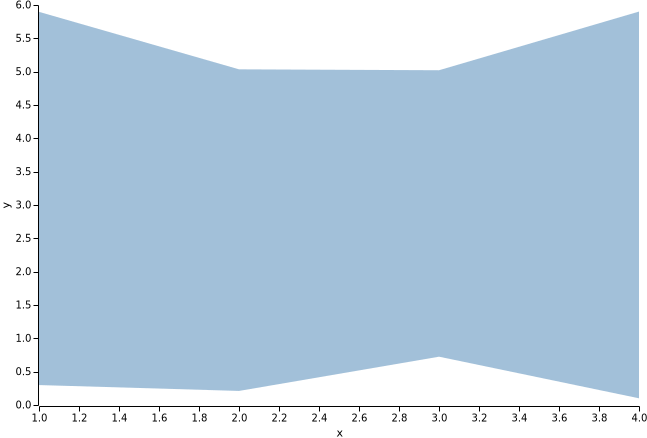

In [1]:
using InMemoryDatasets, DLMReader, StatisticalGraphics



ds = Dataset(
            x = 1:4,
            y = rand(4),
            y2 = rand(4) .+ 5
)

sgplot(ds, Band(x=:x, lower=:y, upper=:y2))

Combining with other plots

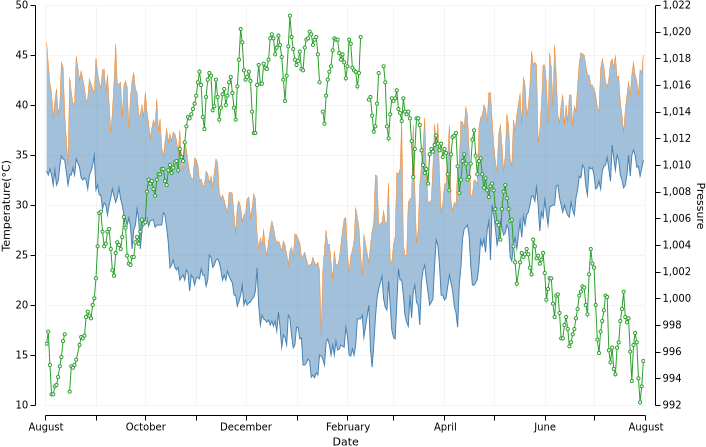

In [2]:
dubai_weather = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                                 "..", "docs", "assets", "dubai_weather.csv"),
                                 types=Dict(1 =>Date))

sgplot(
        dubai_weather,
        [
          Band(x=:date, lower=:min, upper=:max),
          Line(x=:date, y=:min, color="#4682b4", thickness=1),
          Line(x=:date, y=:max, color="#ff7f0e", thickness=0.5),
          Line(x=:date, y=:pressure, color="#2ca02c", y2axis=true, breaks=true),
          Scatter(x=:date, y=:pressure, outlinecolor="#2ca02c", size=10, y2axis=true)
        ],
        xaxis=Axis(offset=10, type=:date, grid=true, griddash=[1, 1], title="Date"),
        yaxis=Axis(offset=10, grid=true, griddash=[1, 1], title="Temperature(°C)"),
        y2axis=Axis(offset=10, title="Pressure")
)

**unemployment stacked area plot across industries**

Reproducing an example from the [`vega`](https://vega.github.io)`s examples collection.

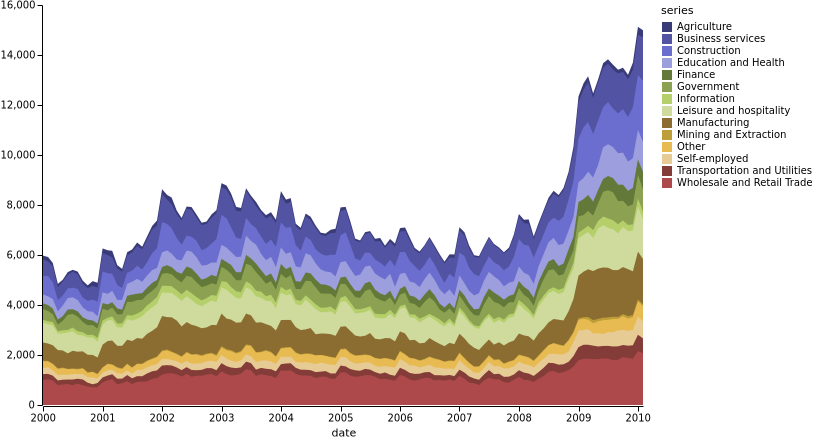

In [3]:
unemployment = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                        "..", "docs", "assets", "unemployment_across_industry.csv"),
                        types = Dict(2=>Date))

sort!(unemployment, :series, rev=true) # keep alphabetical order
modify!(groupby(unemployment, :date), :count=>cumsum=>:cum_sum)
sort!(unemployment, [:date,:cum_sum], rev=[false,true]) # put the larger areas behind the smaller one

sgplot(
        unemployment,
        Band(x=:date, lower=0.0, upper=:cum_sum, group=:series, opacity=1),
        nominal = [:series],
        xaxis=Axis(type=:time, nice=false),
        yaxis=Axis(title=""),
        groupcolormodel = Dict(:scheme=>"category20b"),
      )

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*